# Beispiel einer steifen Differentialgleichung

Curtiss & Hirschfelder erklären die Steifigkeit am folgenden eindimensionalen Beispiel

$$y'(x) = -50\,(y(x) - \cos(x))\quad\text{und}\quad y(0) = 0.$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from odeSolvers import implicitEuler, explicitEuler

In [3]:
def f(x,y):
    return -50*(y-np.cos(x))

def df(x,y):
    return -50

y0 = np.array([0.])

In der Anwendung des Euler-Verfahrens auf das Modellproblem
$$y' = \lambda y,\quad y(0) = 1$$
haben wir für das explizite Verfahren die Bedingung
$$|1+\lambda h| < 1$$
erhalten. Auf unser Problem angewandt folgt
$$|1-50 h| < 1.$$
Da $h > 0$ folgt
$$1-50 h > -1$$
und damit
$$h < \frac{2}{50}.$$

In [4]:
xEE, yEE = explicitEuler(2, 2/50, y0, f)
xEE2, yEE2 = explicitEuler(2, 2.02/50, y0, f)
xEE3, yEE3 = explicitEuler(2, 1.98/50, y0, f)
xIE, yIE = implicitEuler(2, 2/50, y0, f, df)

Im Fall $h=2/50$ oszilliert die numerische Lösung mit konstanter Amplitude. Für $h > 2/50$ nimmt die Amplitude mit jedem Schritt zu und für $h < 2/50$ entsprechend ab.

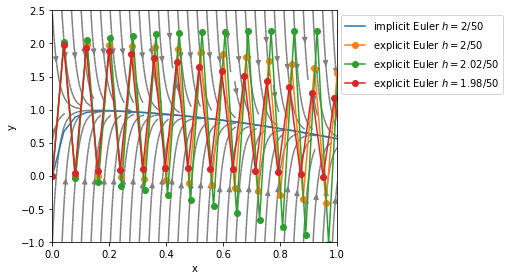

In [5]:
xp = np.linspace(0,2,100)
yp = np.linspace(-1,2.5,100)

Xp, Yp = np.meshgrid(xp,yp)

plt.figure(figsize=(9,4))
plt.streamplot(Xp,Yp,1/np.sqrt(1+f(Xp,Yp)**2),f(Xp,Yp)/np.sqrt(1+f(Xp,Yp)**2), color='gray', density=2)
plt.plot(xIE,yIE, label='implicit Euler $h=2/50$')
plt.plot(xEE,yEE,'-o', label='explicit Euler $h=2/50$')
plt.plot(xEE2,yEE2,'-o', label='explicit Euler $h=2.02/50$')
plt.plot(xEE3,yEE3,'-o', label='explicit Euler $h=1.98/50$')
plt.legend(loc=1,bbox_to_anchor=(1.6, 1))
plt.ylim(-1,2.5)
plt.xlim(0,1)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
#plt.savefig('ExmpStiffProblemCurtisHirschfelder.pdf')
plt.show()